In [1]:
import pandas as pd
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import numpy as np
#from matplotlib.pylab import rcPrarams
import matplotlib.pyplot as plt
#rcParams['figure/figsize']=20,10
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# get mse, msle, mdae, mae, r2,evs
from sklearn.metrics import mean_squared_error,mean_squared_log_error,median_absolute_error,mean_absolute_error,precision_score,r2_score,explained_variance_score

# def mean_absolute_error(y_test,y_pred):
#     return (np.mean(np.abs(y_test-y_pred)))

# def mean_squared_log_error(y_test,y_pred):
#     return (np.mean((np.log(y_test+1)-np.log(y_pred+1))**2))

# def median_absolute_error(y_test,y_pred):
#     return (np.median(np.abs(y_test-y_pred)))


# def mean_squared_error(y_test, y_pred):
#     return np.mean((y_test-y_pred)**2)

# def explained_variance_score(y_test,y_pred):
#     return (1-np.var(y_test-y_pred)/np.var(y_test))


# def r2_score(y_test,y_pred):
#     return (1-(np.sum((y_test-y_pred)**2))/np.sum((y_test-np.mean(y_test))**2))


In [2]:
def get_technical_indicators(dataset):
    #Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['收盘价'].rolling(window = 7).mean()
    dataset['ma21'] = dataset['收盘价'].rolling(window = 21).mean()
    
    #Create MACD
    dataset['26ema'] = dataset['收盘价'].ewm(span = 26).mean()
    dataset['12ema'] = dataset['收盘价'].ewm(span = 12).mean()
    dataset['MACD'] = (dataset['12ema'] - dataset['26ema'])
    
    #Create Bollinger Bands
    dataset['20sd'] = dataset['收盘价'].rolling(window = 20).std()
    dataset['upper_band'] = (dataset['收盘价'].rolling(window = 20).mean()) + (dataset['20sd']*2)
    dataset['lower_band'] = (dataset['收盘价'].rolling(window = 20).mean()) + (dataset['20sd']*2)
    
    #Create Exponential moving average
    dataset['ema'] = dataset['收盘价'].ewm(com = 0.5).mean()
    
    #Create Momentum
    dataset['momentum'] = (dataset['收盘价']/100) - 1
    

In [3]:
import pyecharts.options as opts
from pyecharts.charts import Line
def line_pred_real(y_test,y_pred,name=""):
    x=range(len(y_test))
    y1=y_test
    y2=[round(float(x), 2) for x in y_pred]
    #print(type(y1))
    #print(len(y2))
    line=(
        Line()
        .add_xaxis(xaxis_data=x)
        .add_yaxis(series_name="real_y", y_axis=y1)
        .add_yaxis(series_name="predict_y", y_axis=y2)
        .set_global_opts(title_opts=opts.TitleOpts(title="Predict and Actual data_"+name),yaxis_opts=opts.AxisOpts(min_='dataMin'))
    )
    return line

In [4]:
def evaluate(y_test,y_pred,if_print=1):
    # calculate each index accoring to the result and predict
    mse = mean_squared_error(y_test, y_pred) 
    mdae=median_absolute_error(y_test, y_pred) 
    msle=mean_squared_log_error(y_test, y_pred) 
    mae =mean_absolute_error(y_test, y_pred) 
    evs=explained_variance_score(y_test, y_pred) 
    r2=r2_score(y_test, y_pred) 
    
    if(if_print==1):
        # print the result
        print("\nTesting MSE: {:.3f}".format(mse)) 
        print("\nTesting MDAE: {:.3f}".format(mdae)) 
        print("\nTesting MSLE: {:.3f}".format(msle)) 
        print("\nTesting MAE: {:.3f}".format(mae))
        print("\nTesting EVS: {:.3f}".format(evs))
        print("\nTesting R2: {:.3f}".format(r2))
    return [mse,mdae,msle,mae,evs,r2]

In [5]:
Filename='600016.SH.csv'
# filename='海尔智家.csv'

## Statistical test method


### Mean squared log error
$$
M S L E=\frac{1}{n} \sum_{i=1}^{n}\left(\log \left(y_{i}+1\right)-\log \left(\hat{y}_{i}+1\right)\right)^{2}
$$

### Median absolute error
$$
\operatorname{median}\left(\left|y_{i}-\hat{y_{i}}\right|\right)
$$

### Mean absolute error
$$
\frac{1}{n} \sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|
$$

### Explained variance score
$$
1-\frac{\operatorname{var}(y-\hat{y})}{\operatorname{var}(y)}
$$

### R square
$$
\begin{gathered}
R^{2}(y, \hat{y})=1-\frac{\sum_{i=0}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}} \\
\bar{y}=\frac{1}{n} \sum_{i=1}^{n} y_{i}
\end{gathered}
$$

Text(0, 0.5, '收盘价')

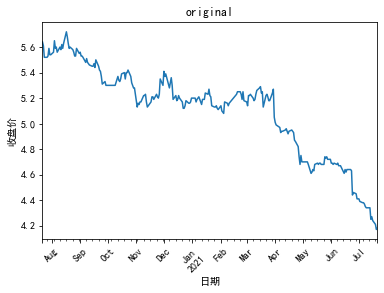

In [6]:
#read the data
df=pd.read_csv(Filename,index_col='交易日期')
#df.head()
# using the date as the indexing 
df.index = pd.DatetimeIndex(df.index).to_period('d')
#display(df.index)

#extract the data we want
ts=df['收盘价'] 
ts=ts.reindex(ts.index[::-1])
#print(ts)

# show the chinese and the sign of number
plt.rcParams['font.sans-serif'] = ['simhei']  
plt.rcParams['axes.unicode_minus'] = False

# draw the picture
ts.plot()
plt.title("original")
plt.xticks(rotation=45)
plt.xlabel('日期')   
plt.ylabel('收盘价')

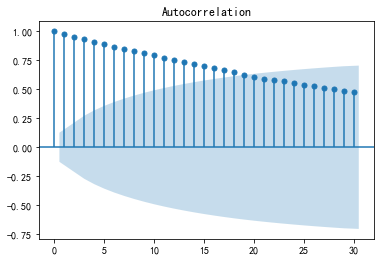

In [7]:
# import the Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_acf
# The lag value range of the "lags" autocorrelation function
plot_acf(ts,use_vlines=True,lags=30)
# shows the Autocorrelation diagram of raw data "ts"
plt.show()

# First order difference

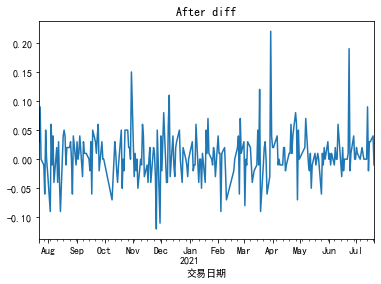

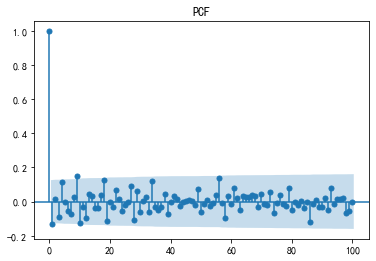

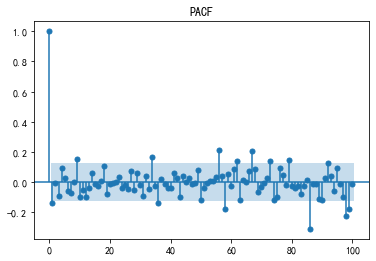

The proobability that the data have no relations: 0.02205763581497144


In [8]:
# First order difference
D_ts = ts.diff(1).dropna()
D_ts.columns = [u'open差分']

# Draw the sequence diagram after difference
D_ts.plot()

# title of the graph
plt.title("After diff")  
#Show the sequence diagram after difference
plt.show()

# import the Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# Draw differential autocorrelation diagram and partial autocorrelation diagram
plot_acf(D_ts,use_vlines=True,lags=100)
# Show the autocorrelation diagram of the data "d_ts" after difference
plt.title("PCF")
plt.show()

plot_pacf(D_ts,use_vlines=True,lags=100)
plt.title("PACF")
plt.show()

#Carry out white noise test on the difference data
from statsmodels.tsa import stattools
#Show the white noise test results and return the statistics and p value
LjungBox=stattools.q_stat(stattools.acf(D_ts)[1:12],len(D_ts)) 
print("The proobability that the data have no relations:",LjungBox[1][-1])

In [9]:
#training
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


train_results = sm.tsa.arma_order_select_ic(D_ts, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)


E:\anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
E:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
E:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn

AIC (3, 3)
BIC (1, 0)


E:\anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
E:\anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


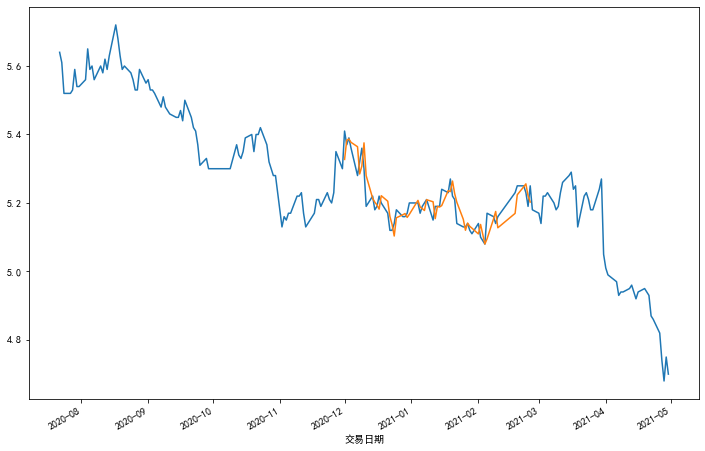

In [10]:
df_tmp=pd.read_csv(Filename,index_col = '交易日期',parse_dates=['交易日期'])
sub = df_tmp['2020-07':'2021-04']['收盘价']
model = sm.tsa.ARIMA(sub, order=(3, 0, 3))
results = model.fit()
predict_sunspots = results.predict(start=str('2020-12'),end=str('2021-02-25'),dynamic=False)
# print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sub.plot(ax=ax)
predict_sunspots.plot(ax=ax)
# show the chinese and the sign of number
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [11]:
predict_sunspots
predict_real = df_tmp['2020-12':'2021-02-25']['收盘价']
# display(predict_real)

name="ARIMA"
line=line_pred_real(predict_real,predict_sunspots,name)
line.render_notebook()

In [12]:
A=evaluate(predict_real,predict_sunspots)


Testing MSE: 0.001

Testing MDAE: 0.022

Testing MSLE: 0.000

Testing MAE: 0.028

Testing EVS: 0.760

Testing R2: 0.759


In [13]:
# test
# how much day we predict
prdict_day=30
train_x=ts[:-1*prdict_day]
real_y=np.array(ts[-1*prdict_day:])

#import the ARIMA library
from statsmodels.tsa.arima_model import ARIMA
# The second is the difference d = 1, the first is the class p, and the third is the order q
model=ARIMA(train_x,order=(3,1,3))
result=model.fit(disp=-1)
# display(result.summary())

# Model diagnosis:
# display(result.conf_int())
# make a prediction
pred=result.forecast(prdict_day)
preds=pred[0]
#display(real_y)
#display(preds)

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [14]:
# seperate the content
train_x=ts[:-1*prdict_day]
real_y=np.array(ts[-1*prdict_day:])
y_test=real_y
y_pred=preds

# A_pre=evaluate(y_test,y_pred)

name="ARIMA"
line=line_pred_real(y_test,y_pred,name)
# line.render_notebook()

# KNN

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))

df = pd.read_csv(Filename)
# print the head
df.head()

df.index = df['交易日期']
##print(df.交易日期)

# sorting
data = df.sort_index(ascending=True, axis=0)

# creating a separate dataset
new_data = pd.DataFrame(index=range(0, len(df)), columns=['开盘价','最高价','最低价','收盘价','成交数量(股)','成交金额(元)'])

# put the dataset
for i in range(0, len(data)):
    new_data['开盘价'][i] = data['开盘价'][i]
    new_data['最高价'][i] = data['最高价'][i]
    new_data['最低价'][i] = data['最低价'][i]
    new_data['收盘价'][i] = data['收盘价'][i]
    new_data['成交数量(股)'][i] = data['成交数量(股)'][i]
    new_data['成交金额(元)'][i] = data['成交金额(元)'][i]
train = new_data[:206]
valid = new_data[206:227]
#print(valid)

#seperate the train and the vaild
x_train = train.drop('收盘价', axis=1)
y_train = train['收盘价']
x_valid = valid.drop('收盘价', axis=1)
y_valid = valid['收盘价']
#display(y_train)
#display(x_valid)

In [16]:
df = pd.read_csv(Filename)
#get_technical_indicators(df)
df = df.fillna(0)
X = df
X.drop("交易日期", axis=1,inplace=True)
y=df.收盘价
y=y.values
X.drop('收盘价',axis=1,inplace=True)
X=X.values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
#display(y_train)

In [17]:
#import libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# making feature engineering
# scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

# using gridsearch to find the best parameter
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]}
knn = neighbors.KNeighborsRegressor()

# form the model of the model
model = GridSearchCV(knn, params, cv=5)

# fit the model and make predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
# evaluate the model
K=evaluate(y_test,y_pred)


Testing MSE: 0.045

Testing MDAE: 0.115

Testing MSLE: 0.001

Testing MAE: 0.161

Testing EVS: 0.749

Testing R2: 0.743


In [19]:
name="KNN"
line=line_pred_real(y_test,y_pred,name)
line.render_notebook()

# KNN hand

In [20]:
# KNN for certain k
def judge_knn(training_mod,k,train_x,train_y,test_x,test_y=0):
    finial_list=[]
    test_x_height=test_x.shape[0]
    for i in range(test_x_height):
        
        # sub the i line and take abs for the dataframe
        
        # euclidean distance
        abs_subp=(train_x-test_x.iloc[i])**2
        #sum by line
        distance_list=(abs_subp.sum(axis=1))**(1/2)
    
        #store the distance and the result into result df
        result_df=pd.concat([distance_list,train_y],axis=1)
        # change the dataframe to array
        result_list=result_df.values
        
        # return the min distance with it result
        closest=result_list[sorted(np.argsort(result_list.T[0])[:k])]
        c_list = closest.mean(axis=0)
        type_w = c_list[-1]# = np.bincount(closest[0])
        
        #get the counts max result
        #type_w = np.argmax(counts)                                       
        
        # put the result for the pridiction line
        finial_list.append(type_w)
    if(training_mod==1):
        pr = test_x.assign(evaluation=pd.Series(test_y).values)
        # insert all the result into the predict dataframe
        pr2 = pr.assign(predict=pd.Series(finial_list).values)
    else:
        pr2 =  test_x.assign(predict=pd.Series(finial_list).values)
    
    return pr2

In [21]:
df = pd.read_csv(Filename)
#get_technical_indicators(df)
df = df.fillna(0)
X = df
X.drop("交易日期", axis=1,inplace=True)
y=df.收盘价
y=y.values
X.drop('收盘价',axis=1,inplace=True)
X=X.values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
#display(y_train)

y_train=pd.Series(y_train.tolist())
y_test=pd.Series(y_test.tolist())

# scaling data
x_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
x_valid_scaled = pd.DataFrame(scaler.fit_transform(X_test))

In [22]:
k=3
df_re=judge_knn(1,k,x_train_scaled,y_train,x_valid_scaled,y_test)
y_pred=df_re.iloc[:,-1]
df_re

,0,1,2,3,4,evaluation,predict
0,0.658065,0.639241,0.637584,0.626311,0.563454,5.13,5.206667
1,0.000000,0.000000,0.000000,0.057506,0.029012,4.18,4.260000
2,0.354839,0.341772,0.362416,0.210294,0.171266,4.72,4.716667
3,0.690323,0.689873,0.697987,0.323155,0.305189,5.27,5.203333
4,0.800000,0.784810,0.798658,0.283205,0.279648,5.37,5.383333
...,...,...,...,...,...,...,...
56,0.445161,0.424051,0.436242,0.084505,0.075708,4.82,4.933333
57,0.903226,0.898734,0.912752,0.509837,0.508770,5.55,5.523333
58,0.935484,0.905063,0.953020,0.115583,0.136154,5.59,5.546667
59,0.625806,0.658228,0.651007,0.327604,0.304804,5.22,5.200000


In [23]:
# evaluate the model
# K_hand=evaluate(y_test,y_pred)
K=evaluate(y_test,y_pred)


Testing MSE: 0.005

Testing MDAE: 0.027

Testing MSLE: 0.000

Testing MAE: 0.042

Testing EVS: 0.975

Testing R2: 0.973


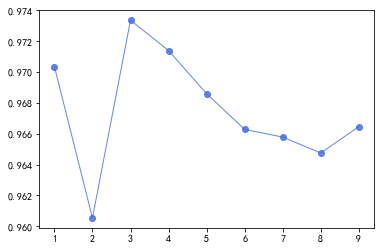

In [24]:
list_r=[]
for k in range(1,10):
    df_re=judge_knn(1,k,x_train_scaled,y_train,x_valid_scaled,y_test)
    y_pred=df_re.iloc[:,-1]
    K_different_k=evaluate(y_test,y_pred,if_print=0);
    list_r.append(K_different_k[-1])

from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']  # show the chinese

x_axis_data = range(1,10)
y_axis_data = list_r

plt.plot(x_axis_data, y_axis_data, 'ro-', color='#4169E1', alpha=0.8, linewidth=1, label='R2')

In [25]:
name="KNN_HAND"
line=line_pred_real(y_test,y_pred,name)
line.render_notebook()

# DeepTree

In [26]:
import pandas as pd
# for normalizing data
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))

# read the file
df = pd.read_csv(Filename)
#initiation
X=df
X.drop('交易日期', axis=1, inplace=True)
X=X.values
y=df.收盘价
y=y.values

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error,median_absolute_error,mean_absolute_error,r2_score,explained_variance_score
from deepforest import CascadeForestRegressor

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Recall the regressor of deepforest
model = CascadeForestRegressor(random_state = 1);
model.fit(X_train, y_train);
y_pred = model.predict(X_test)#prediction
#scores
y_pred=y_pred.reshape(-1)
D=evaluate(y_test,y_pred)

[2021-12-19 13:02:23.989] Start to fit the model:
[2021-12-19 13:02:23.992] Fitting cascade layer = 0 
[2021-12-19 13:02:24.629] layer = 0  | Val MSE = 0.00040 | Elapsed = 0.637 s
[2021-12-19 13:02:24.631] Fitting cascade layer = 1 
[2021-12-19 13:02:25.333] layer = 1  | Val MSE = 0.00046 | Elapsed = 0.702 s
[2021-12-19 13:02:25.334] Early stopping counter: 1 out of 2
[2021-12-19 13:02:25.335] Fitting cascade layer = 2 
[2021-12-19 13:02:25.889] layer = 2  | Val MSE = 0.00044 | Elapsed = 0.554 s
[2021-12-19 13:02:25.889] Early stopping counter: 2 out of 2
[2021-12-19 13:02:25.889] Handling early stopping
[2021-12-19 13:02:25.890] The optimal number of layers: 1
[2021-12-19 13:02:25.894] Start to evalute the model:
[2021-12-19 13:02:25.894] Evaluating cascade layer = 0 

Testing MSE: 0.001

Testing MDAE: 0.012

Testing MSLE: 0.000

Testing MAE: 0.019

Testing EVS: 0.995

Testing R2: 0.994


In [28]:
name="DeepTree"
line=line_pred_real(y_test,list(y_pred),name)
line.render_notebook()

# XGBoost

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler(feature_range=(0,1))
#read the file
df = pd.read_csv(Filename)
#print the head
df.head()
df.index = df['交易日期']
#sorting
data = df.sort_index(ascending = True, axis = 0)
# creating a separate dataset
new_data = pd.DataFrame(index = range(0,len(df)), columns = ['开盘价','最高价','最低价','收盘价','成交数量(股)','成交金额(元)'])
#assign the newdata with original data
for i in range(0,len(data)):
    new_data['开盘价'][i] = data['开盘价'][i]
    new_data['最高价'][i] = data['最高价'][i]
    new_data['最低价'][i] = data['最低价'][i]
    new_data['收盘价'][i] = data['收盘价'][i]
    new_data['成交数量(股)'][i] = data['成交数量(股)'][i]
    new_data['成交金额(元)'][i] = data['成交金额(元)'][i]
train = new_data[:206]
valid = new_data[206:227]
#print(valid)
#set train and valild
x_train = train.drop('收盘价',axis=1)
y_train = train['收盘价']
x_valid = valid.drop('收盘价',axis=1)
y_valid = valid['收盘价']

In [31]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#read the file
df = pd.read_csv(Filename)
# get_technical_indicators(df)
#data procession 
df = df.fillna(0)
X = df
X.drop('交易日期', axis = 1, inplace = True)
y = df.收盘价
y = y.values
X.drop('收盘价',axis = 1, inplace = True)
X = X.values

#splite the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [32]:
#recallRegression prediction
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred=list(y_pred)

#score
XG=evaluate(y_test,y_pred)


Testing MSE: 0.002

Testing MDAE: 0.021

Testing MSLE: 0.000

Testing MAE: 0.032

Testing EVS: 0.988

Testing R2: 0.988


In [33]:
y_test=list(y_test)
name="XGBoost"
line=line_pred_real(y_test,y_pred,name)
line.render_notebook()

# Random forest

In [34]:
import numpy as np
from numpy import *
import os
import pandas as pd
import random

trees=10 # Number of Trees
n_features=7 # Number of features
max_depth=20 # Max depth of trees


# Split dataset into training set and testing set
def split_train_test_data(dataSet):
    # Select all the lines where the value of feature is larger than value
    X_train=dataSet[np.nonzero(dataSet[:,0]<'2021-05-31')[0],:]
    X_test=dataSet[np.nonzero(dataSet[:,0]>'2021-05-31')[0],:]
    y_train=X_train[:,4]
    X_test = X_test[15:]
    y_test=X_test[:,4]
    return X_train,X_test,y_train,y_test

def binSplitDataSet(dataSet,feature,value):
    mat0=dataSet[np.nonzero(dataSet[:,feature]>value)[0],:]
    mat1=dataSet[np.nonzero(dataSet[:,feature]<value)[0],:]
    return mat0,mat1

# Calculate variance
def regErr(dataSet):
    return np.var(dataSet[:,4])*shape(dataSet)[0]

# Calculate mean 
def regLeaf(dataSet):
    return np.mean(dataSet[:,4])

# Choose the best tree
def chooseBestSplit(dataSet, n_features):
    # There is no need of cutting branch for random forest
    f = dataSet.shape[1]
    index = []
    bestS = inf
    best_feature, bestValue = 0, 0
    # Calculate the variance
    S = regErr(dataSet) 
    a = 0
    
    for i in range(n_features):
        # Randomly select n_features data and put them into list index
        index.append(np.random.randint(f))
    ##print(index)
    # Scale the dataset for index time, with feature as property
    for feature in index:
        # Use set to remove duplicate
        # Try each element in the set to find the fittest data for spliting
        # Fittest here means the minimize of variance for each parts
        for splitVal in set(dataSet[:,feature]):  
            # Split 
            mat0, mat1 = binSplitDataSet(dataSet, feature, splitVal)
            try:
                # Sum of the variance of two matrix
                newS = regErr(mat0) + regErr(mat1) 
                # If newS is smaller than given bestS, update the data
                if bestS > newS:
                    bestfeature = feature
                    bestValue = splitVal
                    bestS = newS
            except ZeroDivisionError:
                pass
            continue
    if (shape(mat0)[0] < 10) or (shape(mat1)[0] < 10):
    # print(regLeaf(dataSet))
        return None, regLeaf(dataSet)
    ##print(bestValue)
    return bestfeature, bestValue

# Use recursion to create tree
def createTree(dataSet, n_features, max_depth):
    # Use chooseBestSplit function to get bestfeature and bestValue
    bestfeature, bestValue = chooseBestSplit(dataSet, n_features)
    if bestfeature == None:
        # print(bestValue)
        return bestValue
    max_depth -= 1
    # Control the depth of the tree
    if max_depth < 0: 
        # When depth is less then the number announced, return the mean of the dataset
        return regLeaf(dataSet)
    # Build up tree
    retTree = {}
    retTree['bestFeature'] = bestfeature
    retTree['bestVal'] = bestValue
    lSet, rSet = binSplitDataSet(dataSet, bestfeature, bestValue)
    retTree['right'] = createTree(rSet, n_features, max_depth)
    retTree['left'] = createTree(lSet, n_features, max_depth)
    return retTree


# Create forest
def RandomForest(trees,n_features, max_depth):
    Trees = []
    # Create n trees to form a forest
    for i in range(trees):
        Trees.append((createTree(X_train,n_features,max_depth)))
    return Trees


# Use recusion to do the forecast of a single sample
def TreeForecast(tree, data):
    # Check whether the tree is a dictionary
    # If the tree is not a dictionary, the recursion meets the base case
    if not isinstance(tree, dict):
        # print(type(tree))
        # print(float(tree))
        return float(tree)
    # If value of bestFeature in a data is larger than the value of bestVal in a tree
    # Check that whether left tree is float type
    if data[tree['bestFeature']] > tree['bestVal']:
        # If so, return left tree
        if type(tree['left']) == 'float':
            return tree['left']
        # Else, do the recursion through left tree
        else:
            return TreeForecast(tree['left'], data)
    # If not, do the same procedure to the right tree
    else:
        if type(tree['right']) == 'float':
            return tree['right']
        else:
            return TreeForecast(tree['right'], data)

# Create forecast dataset by using TreeForecast function for many times
def createForeCast(tree, dataSet):
    n = len(dataSet)
    # Using np.mat to transfer the datatype into float
    # Create an n*1 array with float datatype
    yhat = np.mat(zeros((n, 1)))
    # For each element in the array, use TreeForecast to predict
    for i in range(n):
        yhat[i, 0] = TreeForecast(tree, dataSet[i, :])
        # print(yhat[i,0])
    return yhat

# Use random forest to predict
def Predict(Trees,dataSet):
    n=len(dataSet)
    # Create an n*1 array with float datatype
    yhat=np.mat(zeros((n,1)))
    # Use every tree in forest to predict the value
    # Use yhat to store the predicted value
    for tree in Trees: 
        yhat+=createForeCast(tree,dataSet)#createForecast返回的是一个数组
    # Calculate the mean value of each prediction
    yhat/=len(Trees)
    return yhat

In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error,median_absolute_error,mean_absolute_error,precision_score,r2_score,explained_variance_score
scaler = MinMaxScaler(feature_range = (0,1))

# Read the file
df = pd.read_csv(Filename)

# Process the data
X = df
X.drop('交易日期', axis = 1, inplace = True)
X = X.values
y = df.收盘价
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# Do the random forest training
#print(len(y_test))
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Examine the model
R=evaluate(y_test,y_pred)


Testing MSE: 0.001

Testing MDAE: 0.005

Testing MSLE: 0.000

Testing MAE: 0.014

Testing EVS: 0.996

Testing R2: 0.996


In [36]:
name="RandomForest"
line=line_pred_real(y_test,list(y_pred),name)
line.render_notebook()

# LightGBM

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

# Read the file
df = pd.read_csv(Filename)

df.index = df['交易日期']

# Sort the file by ascending
data = df.sort_index(ascending = True, axis = 0)

# Create a new data set to do the separation
new_data = pd.DataFrame(index = range(0,len(df)), columns = {
    '开盘价','最高价','最低价','收盘价','成交数量(股)','成交金额(元)'})
for i in range(0,len(data)):
    new_data['开盘价'][i] = data['开盘价'][i]
    new_data['最高价'][i] = data['最高价'][i]
    new_data['最低价'][i] = data['最低价'][i]
    new_data['收盘价'][i] = data['收盘价'][i]
    new_data['成交数量(股)'][i] = data['成交数量(股)'][i]
    new_data['成交金额(元)'][i] = data['成交金额(元)'][i]
train = new_data[:206]
valid = new_data[206:227]

x_train = train.drop('收盘价', axis = 1)
y_train = train['收盘价']
x_valid = valid.drop('收盘价', axis = 1)
y_valid = valid['收盘价']

In [38]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error,median_absolute_error,mean_absolute_error,precision_score,r2_score,explained_variance_score

scaler = MinMaxScaler(feature_range = (0,1))

# Scale the data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

# Read file
df = pd.read_csv(Filename)
#get_technical_indicators(df)
df = df.fillna(0)
X = df
X.drop('交易日期', axis = 1, inplace = True)
y = df.收盘价
y = y.values
X.drop('收盘价', axis = 1, inplace = True)
X = X.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# print(len(y_test))
model = LGBMRegressor(random_state = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
LGB=evaluate(y_test,y_pred)


Testing MSE: 0.010

Testing MDAE: 0.030

Testing MSLE: 0.000

Testing MAE: 0.061

Testing EVS: 0.945

Testing R2: 0.945


In [39]:
name="LightGBM"
line=line_pred_real(y_test,list(y_pred),name)
line.render_notebook()

# Visualization

In [40]:
x_label=['MSE','MDAE','MSLE','MAE','EVS','R2']
# y_label=['AIRMA','Knn','XGBoost','LightGB','RandForest','DeepForest','Knn_hand']
y_label=['AIRMA','Knn','XGBoost','LightGB','RandForest','DeepForest']
table=[A,K,XG,LGB,D,R]
table1=pd.DataFrame(table,index=y_label, columns=x_label)
table1 = np.abs(table1)
table2 = table1.copy(deep=True)
table2

,MSE,MDAE,MSLE,MAE,EVS,R2
AIRMA,0.001329,0.022368,0.000034,0.028235,0.759625,0.759298
Knn,0.004649,0.026667,0.000119,0.042459,0.975015,0.973360
XGBoost,0.002055,0.020649,0.000057,0.032262,0.988278,0.988226
LightGB,0.009595,0.030117,0.000310,0.061013,0.945209,0.945024
RandForest,0.000962,0.011750,0.000030,0.019403,0.994502,0.994489
DeepForest,0.000629,0.004800,0.000019,0.013861,0.996410,0.996398


In [41]:
table1.iloc[:,-2:]=1/table1.iloc[:,-2:]
table1

,MSE,MDAE,MSLE,MAE,EVS,R2
AIRMA,0.001329,0.022368,0.000034,0.028235,1.316439,1.317006
Knn,0.004649,0.026667,0.000119,0.042459,1.025625,1.027369
XGBoost,0.002055,0.020649,0.000057,0.032262,1.011861,1.011914
LightGB,0.009595,0.030117,0.000310,0.061013,1.057967,1.058174
RandForest,0.000962,0.011750,0.000030,0.019403,1.005528,1.005541
DeepForest,0.000629,0.004800,0.000019,0.013861,1.003603,1.003615


In [42]:
# getting the heat map
from pyecharts.charts import HeatMap
import numpy as np

data=table1
value= [[y, x, data.iloc[x,y]] for x in range(len(y_label)) for y in range(len(x_label))]

heatmap = (HeatMap()
            .add_xaxis(x_label)
            .add_yaxis("index", y_label, value)
            .set_global_opts(
                title_opts=opts.TitleOpts(title="Index for each model"),
                    visualmap_opts=opts.VisualMapOpts(max_=0.1)
            )
        )
heatmap.render_notebook()

In [43]:
for i in range(len(x_label)):
    k = 1
    col = i
    if i<len(x_label)-2:
        table2.sort_values(by=x_label[i],axis=0,ascending=False,inplace=True)
    else:
        table2.sort_values(by=x_label[i],axis=0,ascending=True,inplace=True)
    for j in range(1,len(y_label)+1):
        table2.replace(table2.iloc[j-1,col],k,inplace=True)
        k = k+1
table2

,MSE,MDAE,MSLE,MAE,EVS,R2
AIRMA,4.0,3.0,4.0,4.0,1.0,1.0
LightGB,1.0,1.0,1.0,1.0,2.0,2.0
Knn,2.0,2.0,2.0,2.0,3.0,3.0
XGBoost,3.0,4.0,3.0,3.0,4.0,4.0
RandForest,5.0,5.0,5.0,5.0,5.0,5.0
DeepForest,6.0,6.0,6.0,6.0,6.0,6.0


In [44]:
x_label_r=['MSE_Score','MDAE_Score','MSLE_Score','MAE_Score','EVS_Score','R2_Score']

import pyecharts.options as opts
from pyecharts.charts import Radar
edge=len(y_label)+1
a=[]
c=(
    Radar(init_opts=opts.InitOpts(bg_color="#ffffff"))   #设置背景颜色
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name="MSE_Score", max_=edge),
            opts.RadarIndicatorItem(name="MDAE_Score", max_=edge),
            opts.RadarIndicatorItem(name="MSLE_Score", max_=edge),
            opts.RadarIndicatorItem(name="MAE_Score", max_=edge),
            opts.RadarIndicatorItem(name="EVS_Score", max_=edge),
            opts.RadarIndicatorItem(name="R2_Score", max_=edge),
        ],
        splitarea_opt=opts.SplitAreaOpts(
            is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)  #是否显示分隔区域，透明度设置为1
        ),
        textstyle_opts=opts.TextStyleOpts(color="#000"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))  #不显示数字
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Model comparison"), legend_opts=opts.LegendOpts()
    )
)
max = len(y_label)
c_list=['red','blue','black','purple','green','orange','yellow']
for i in range(max):
#     C=int((0xfBCE00)*i/max)
#     s_color="#"+str(hex(C)[2:])
    s_color=c_list[i]
    a=[]
    a.append(list(table2.iloc[i]))
    #eval str 
    c.add(
            series_name=table2.index[i],
            data=a,
            linestyle_opts=opts.LineStyleOpts(color=s_color,width=2),   #线的颜色、宽度
        )
c.render_notebook()

In [45]:
# getting the heat map
from pyecharts.charts import HeatMap
import numpy as np

data=table2
xx_label=list(data.index)
yy_label=list(data.columns)
value= [[y, x, int(data.iloc[x,y])] for x in range(len(y_label)) for y in range(len(x_label))]

heatmap = (HeatMap()
            .add_xaxis(yy_label)
            .add_yaxis("index", xx_label, value,label_opts=opts.LabelOpts(is_show=True, position="inside"))
            .set_global_opts(
                title_opts=opts.TitleOpts(title="Index rank"),
                    visualmap_opts=opts.VisualMapOpts(min_=1,max_=len(x_label))
            )
        )
heatmap.render_notebook()